# Gene expression

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [2]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/CHIMP/cluster_adata.h5ad'

In [3]:
adata = sc.read(adata_input)

In [4]:
#open human lncRNA txt file
HUM_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping/annotation_starsolo/lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    HUM_lncRNAs.append(l)
f.close()

In [5]:
#open chimp lncRNA txt file
CHIMP_lncRNAs = []
f = open('/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/data/mapping_own_ref/CHIMP/annotation_starsolo/CHIMP_lncRNAs.txt', "r")
for line in f:
    l = line.strip('\n')
    CHIMP_lncRNAs.append(l)
f.close()

In [6]:
adata

AnnData object with n_obs × n_vars = 16250 × 27947
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'Undif. SG_score', 'Dif. SG_score', 'SC.I_score', 'SC.II_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.4', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'leiden_R.4_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'd

In [7]:
category_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage']

In [8]:
palette_dict = {"Undif. SG":'lightblue',"Dif. SG":'blue',"SC.I":'lightgreen','SC.II':'green','Early round SD':'yellow','Late round SD':'orange','Elong. SD':'red','Sertoli':'pink','Macrophage':'brown'}

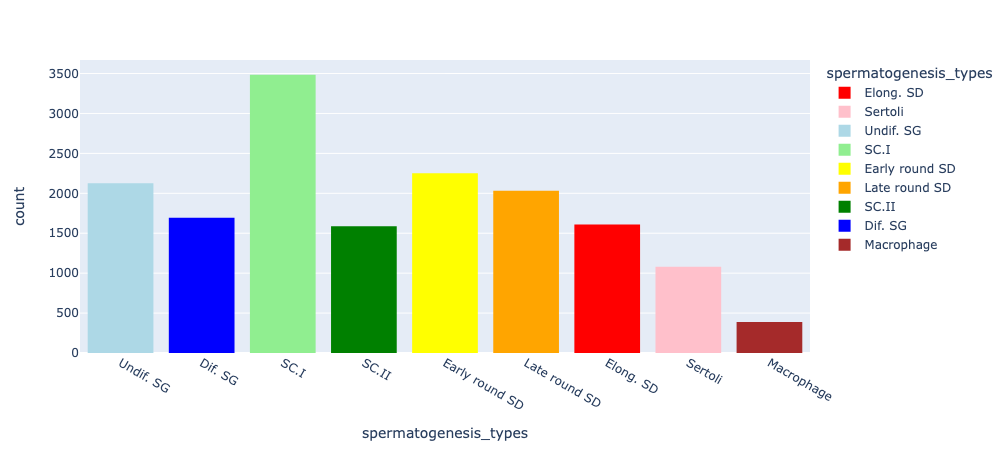

In [9]:
fig = px.histogram(adata.obs['spermatogenesis_types'], x='spermatogenesis_types', color='spermatogenesis_types',color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=800,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()


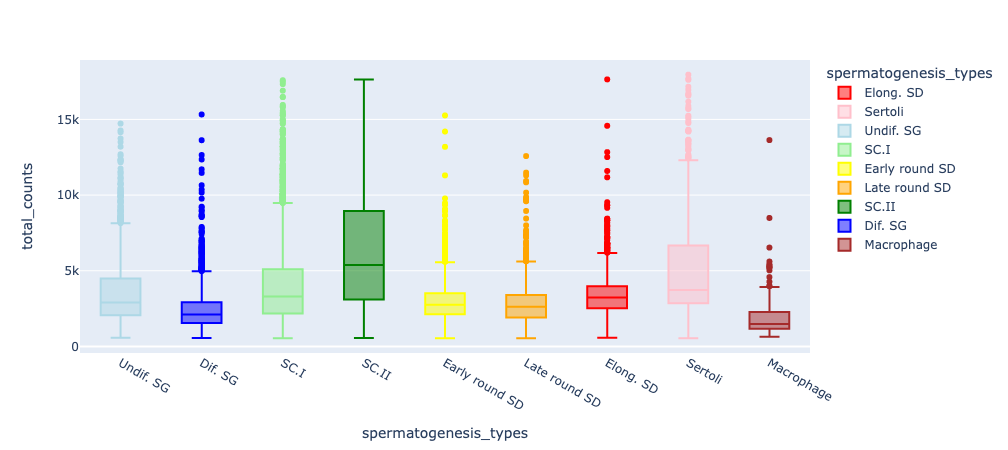

In [10]:
fig = px.box(adata.obs, x='spermatogenesis_types', y='total_counts', color='spermatogenesis_types', color_discrete_map=palette_dict)
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=category_order
    ),
    autosize=False,
    width=500,
)
fig.show()

In [11]:
# LINC genes, True/False vector
LINC = ['LINC' in i for i in adata.var_names] 

In [12]:
LINC_genes = adata[:,LINC].var_names

In [13]:
LINC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01770',
       'LINC01134', 'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777',
       ...
       'LINC01278', 'LINC00630', 'LINC02589', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1593)

1593 LINC genes in total are expressed

In [14]:
#LINC genes annotated in MAC
for gene in CHIMP_lncRNAs:
    if 'LINC' in gene:
        print(gene)

LINC01750


In [15]:
shared_lnc = []
for gene in HUM_lncRNAs:
        if gene in adata.var_names:
            shared_lnc.append(gene)
len(shared_lnc)

10689

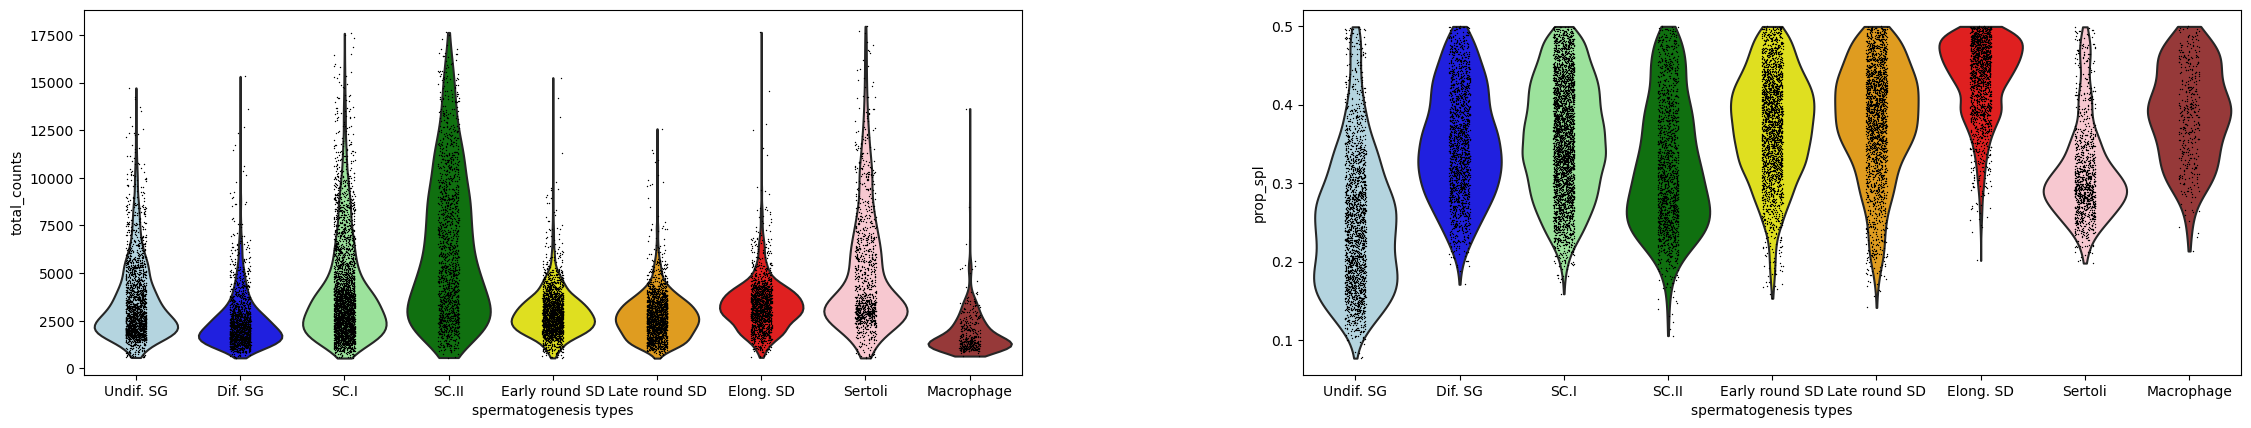

In [16]:
with rc_context({'figure.figsize': (10, 5)}):
    sc.pl.violin(adata, ['total_counts', 'prop_spl'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

In [17]:
adata

AnnData object with n_obs × n_vars = 16250 × 27947
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'Undif. SG_score', 'Dif. SG_score', 'SC.I_score', 'SC.II_score', 'Early round SD_score', 'Late round SD_score', 'Elong SD_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'leiden_R.4', 'leiden_R.3', 'leiden_R.2', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'DATASET_colors', 'DE_leiden', 'DE_leiden_celltype', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.2_colors', 'leiden_R.3_colors', 'leiden_R.4_colors', 'neighbors', 'pca', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'norm_sct', 'raw_counts', 'spliced', 'umi_corr', 'unspliced'
    obsp: 'connectivities', 'd

In [18]:
adata.uns['DE_leiden_celltype']['names']

array([('AUTS2', 'MAPK10', 'FAM229A', 'GJB6', 'MALAT1', 'TTC28', 'C1QTNF3', 'ERBB4', 'NALF1'),
       ('STAG1', 'SPAG16', 'CCDC168', 'IQCM', 'IGFBP7', 'LOC105373554', 'CRB1', 'DIAPH2', 'NRG3'),
       ('RERE', 'CNBD1', 'LOC730098', 'CNBD1', 'TSHZ2', 'ATRNL1', 'CCDC38', 'NEAT1', 'PARD3'),
       ('UBE2E2', 'KCNT2', 'GOLGA6L7', 'CCSER1', 'EBF1', 'HORMAD1', 'ANKRD30B', 'CARMIL1', 'NLGN1'),
       ('HELLS', 'GOLGA6L2', 'C20orf144', 'TSBP1', 'RBMS3', 'ANKRD30A', 'ZNF385D', 'ZBTB20', 'MTUS2'),
       ('SMC1B', 'LOC105372004', 'FAM186A', 'SLC44A5', 'MIR99AHG', 'HORMAD2', 'STRBP', 'MALAT1', 'CNTN4'),
       ('SPIDR', 'TTC29', 'LOC101928012', 'GOLGA6L2', 'ZBTB20', 'LOC105376107', 'ANKRD62', 'CTNNA2', 'CALN1'),
       ('JMJD1C', 'WDR41', 'PPP2R2B', 'COL25A1', 'NEAT1', 'LOC100506207', 'MIR548A1HG', 'NCOA2', 'MEF2C-AS1'),
       ('GPHN', 'FRMD5', 'ERICH2', 'STXBP5-AS1', 'BNC2', 'MLLT10', 'POLK', 'BBX', 'N6AMT1'),
       ('B3GALT1', 'PACRG', 'PFN3', 'CCDC91', 'LAMA2', 'SPDYA', 'ANKRD30A', 'GPC5', '

In [19]:
top50 = pd.DataFrame(adata.uns['DE_leiden_celltype']['names']) # top 5 ranked genes for each cluster

top50.head()

Dif. SG Early round SD  Elong. SD Late round SD Macrophage          SC.I  \
0   AUTS2         MAPK10    FAM229A          GJB6     MALAT1         TTC28   
1   STAG1         SPAG16    CCDC168          IQCM     IGFBP7  LOC105373554   
2    RERE          CNBD1  LOC730098         CNBD1      TSHZ2        ATRNL1   
3  UBE2E2          KCNT2   GOLGA6L7        CCSER1       EBF1       HORMAD1   
4   HELLS       GOLGA6L2  C20orf144         TSBP1      RBMS3      ANKRD30A   

      SC.II  Sertoli Undif. SG  
0   C1QTNF3    ERBB4     NALF1  
1      CRB1   DIAPH2      NRG3  
2    CCDC38    NEAT1     PARD3  
3  ANKRD30B  CARMIL1     NLGN1  
4   ZNF385D   ZBTB20     MTUS2

In [20]:
# all lncRNA genes in the top 50 genes from DEA
top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[],'Macrophage':[]}

for celltype, genes in top50.items():
    for gene in genes:
        if gene in HUM_lncRNAs:
            top50_lnc[celltype].append(gene)

In [21]:
top50_lnc

{'Undif. SG': ['MEF2C-AS1',
  'LOC105377171',
  'LOC107986770',
  'LOC105376755',
  'LOC442028',
  'LINC00624'],
 'Dif. SG': ['LOC100507336',
  'LINC02645',
  'LOC101927026',
  'LOC107985508',
  'ZBTB46-AS1',
  'LOC105377171',
  'MEF2C-AS1',
  'LINC00333',
  'SPANXA2-OT1'],
 'SC.I': ['LOC105373554',
  'LOC105376107',
  'LOC100506207',
  'LOC105373786',
  'LINC02478',
  'MGC4859',
  'LINC00466',
  'CLCA4-AS1',
  'LOC105377632'],
 'SC.II': ['MIR548A1HG',
  'LINC01818',
  'ANKRD20A4-ANKRD20A20P',
  'LINC01206',
  'DLEU1',
  'SCHLAP1',
  'AP4B1-AS1',
  'ADD3-AS1',
  'LOC100506207',
  'LOC440910',
  'LOC105379207',
  'LOC112268136',
  'SNHG31'],
 'Early round SD': ['LOC105372004',
  'LOC101929492',
  'LINC01500',
  'LOC101928236',
  'LOC105372733',
  'STXBP5-AS1',
  'LOC105375551',
  'LOC107984035',
  'LINC01609',
  'LOC105374007',
  'LOC105377110'],
 'Late round SD': ['STXBP5-AS1',
  'LOC105369838',
  'LOC105372733',
  'LOC107984035',
  'LOC101929563',
  'LINC01492',
  'GABRG3-AS1',
  'LOC

In [22]:
lnc_count = {}

for celltype, genes in top50_lnc.items():
    lnc_count[celltype]=len(genes)

In [23]:
lnc_count

{'Undif. SG': 6,
 'Dif. SG': 9,
 'SC.I': 9,
 'SC.II': 13,
 'Early round SD': 11,
 'Late round SD': 11,
 'Elong. SD': 6,
 'Sertoli': 8,
 'Macrophage': 10}

In [24]:
# lncRNA genes in species own annotation
chimp_top50_lnc = {'Undif. SG':[],'Dif. SG':[],'SC.I':[],'SC.II':[],'Early round SD':[],'Late round SD':[],'Elong. SD':[],'Sertoli':[],'Macrophage':[]}
            
for celltype,genes in top50_lnc.items():
    print(celltype)
    for gene in genes:
        if gene in CHIMP_lncRNAs:
            print(gene)
            chimp_top50_lnc[celltype].append(gene)
            
# TTTY14 from sertoli is in the species own annotation

Undif. SG
Dif. SG
SC.I
SC.II
Early round SD
Late round SD
Elong. SD
Sertoli
Macrophage


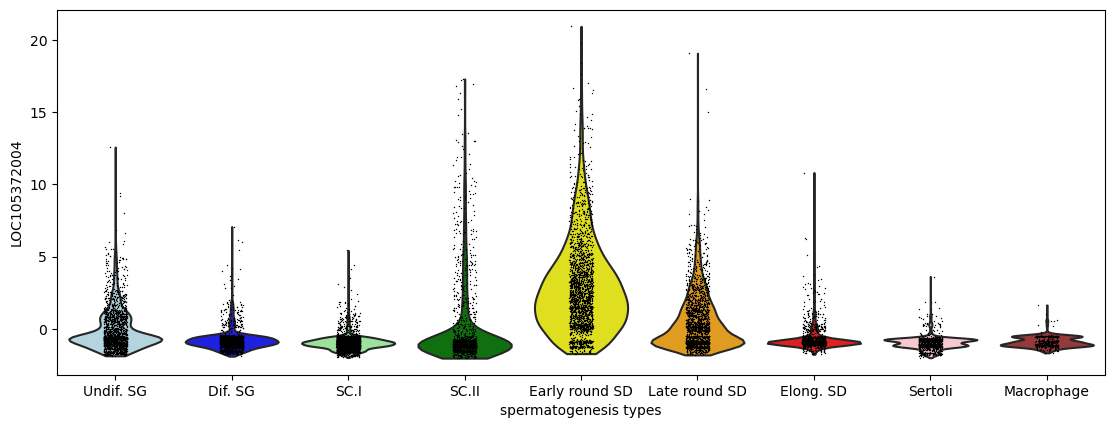

In [25]:
# to compare to a certain gene across groups
# no. 4 in SC.II
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC105372004'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

In [26]:
adata.X = adata.layers['raw_counts'].copy() 

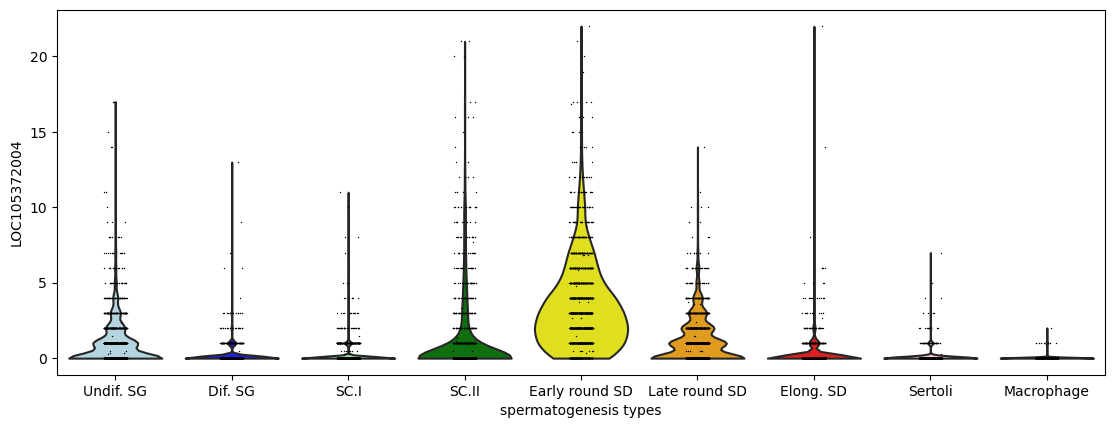

In [27]:
# raw counts are discrete
# to compare to a certain gene across groups
# no. 1 in early round
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC105372004'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

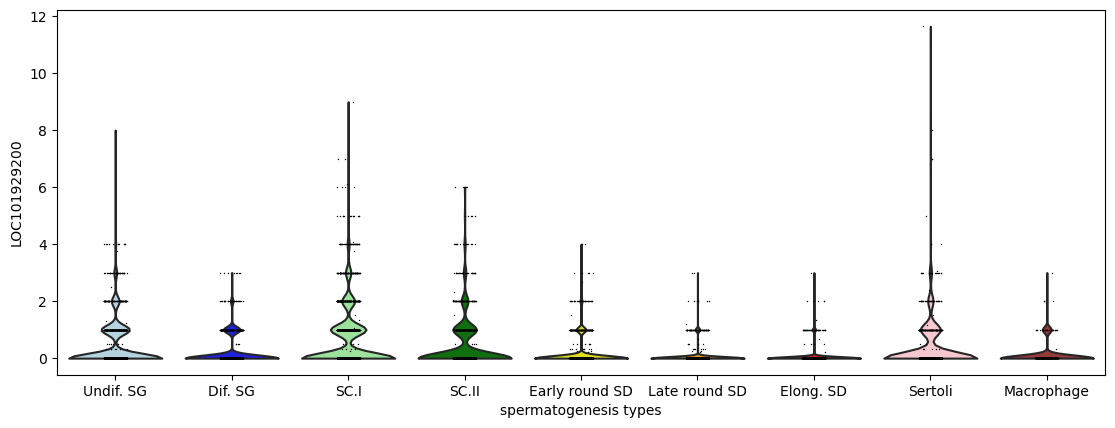

In [28]:
# no. 1 in sertoli
with rc_context({'figure.figsize': (11, 5)}):
    sc.pl.violin(adata, ['LOC101929200'], groupby='spermatogenesis_types', order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

In [34]:
adata.X = adata.layers['norm_sct'].copy() 

In [35]:
to_plot = []
to_plot = [top50_lnc[celltype][0] for celltype in top50_lnc]

In [36]:
to_plot

['MEF2C-AS1',
 'LOC100507336',
 'LOC105373554',
 'MIR548A1HG',
 'LOC105372004',
 'STXBP5-AS1',
 'LOC101928012',
 'NEAT1',
 'MALAT1']

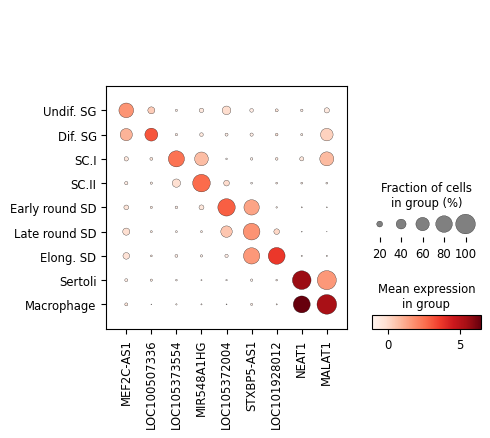

In [37]:
sc.pl.dotplot(adata, to_plot, groupby='spermatogenesis_types', categories_order=['Undif. SG','Dif. SG','SC.I','SC.II','Early round SD','Late round SD','Elong. SD','Sertoli','Macrophage'])

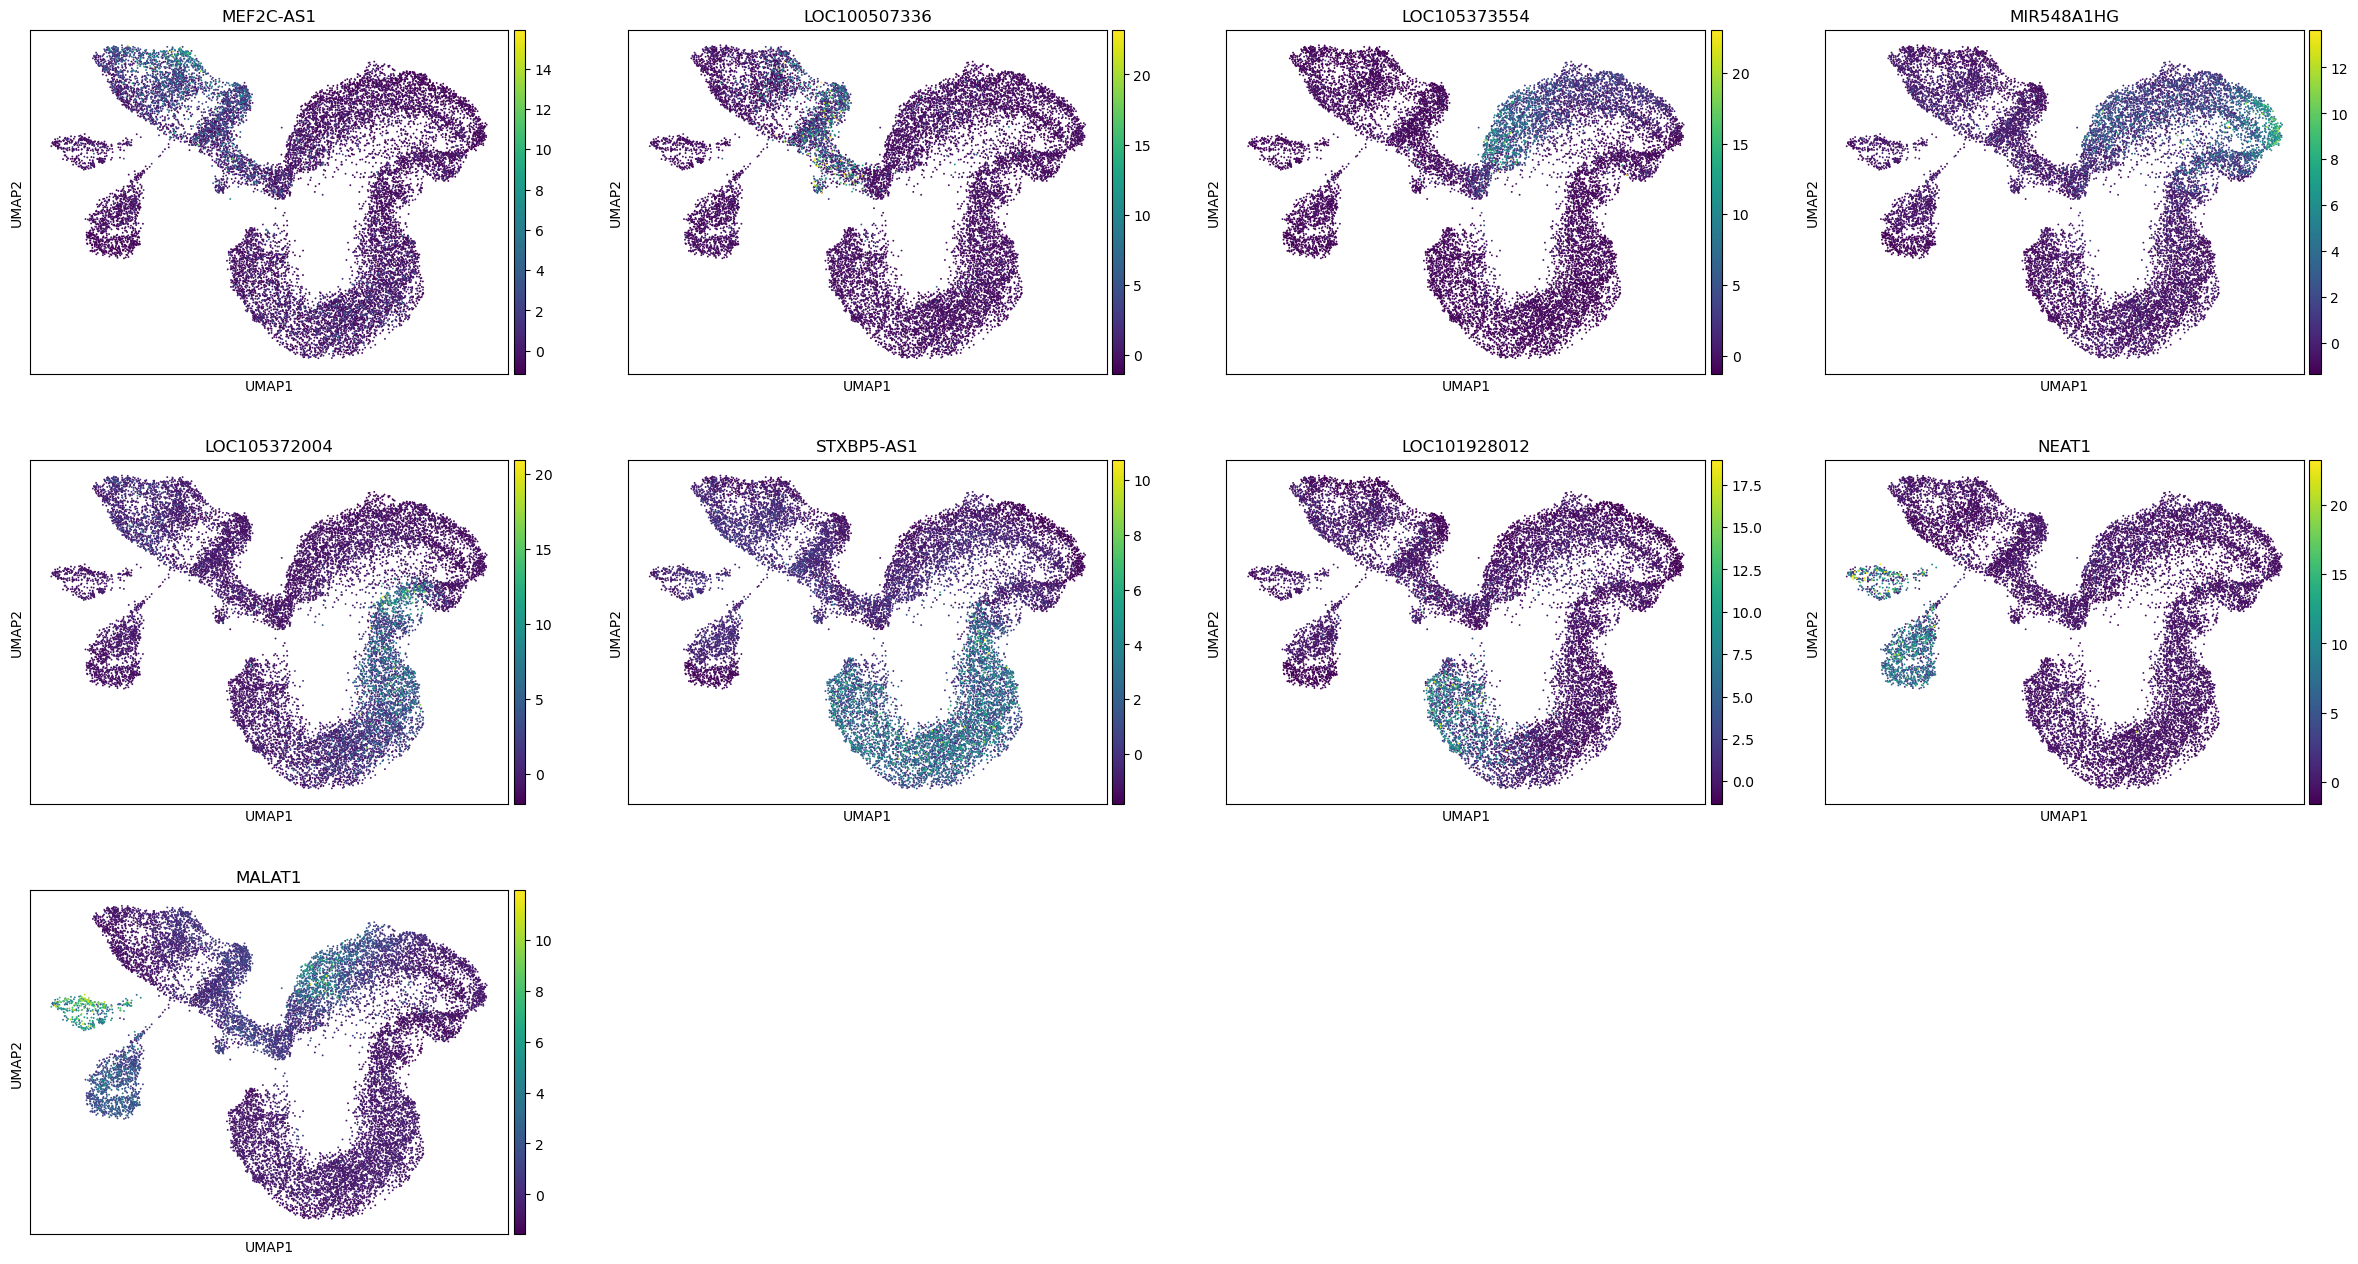

In [38]:
# UMAP colored by the top genes
# None of them in the species own annotation
sc.plotting.umap(adata, color=to_plot)